# Monte-Carlo iterations

In [1]:
%load_ext autoreload
%autoreload 2

import cfr

## Create a reconstruction job object

In [2]:
job = cfr.ReconJob(verbose=True)
print(job)

>>> job.configs:
{}


## Load a proxy database

In [3]:
job.load_proxydb('./data/pages2k_dataset.pkl', verbose=True)

>>> job.configs["proxydb_path"] = ./data/pages2k_dataset.pkl
>>> 692 records loaded
>>> job.proxydb created


## Filter a proxy database

>>> 104 records remaining
>>> job.proxydb updated


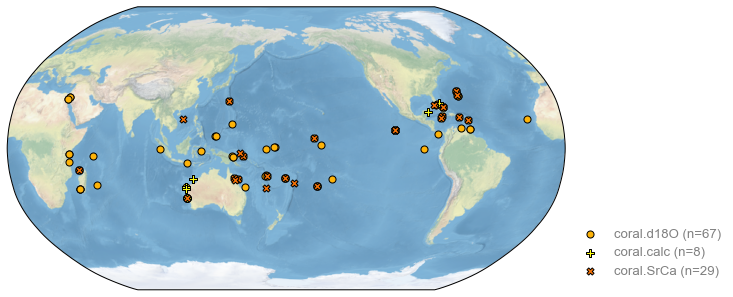

In [4]:
# job.filter_proxydb() will modify job.proxydb by default
job.filter_proxydb(by='ptype', keys=['coral'], verbose=True)
fig, ax = job.proxydb.plot()

## Annualize/seasonalize the proxy database

>>> job.configs["annualize_proxydb_months"] = [12, 1, 2]
>>> job.configs["annualize_proxydb_ptypes"] = ['coral']


Annualizing ProxyRecord: 100%|██████████| 104/104 [00:05<00:00, 19.85it/s]


>>> 94 records remaining
>>> job.proxydb updated


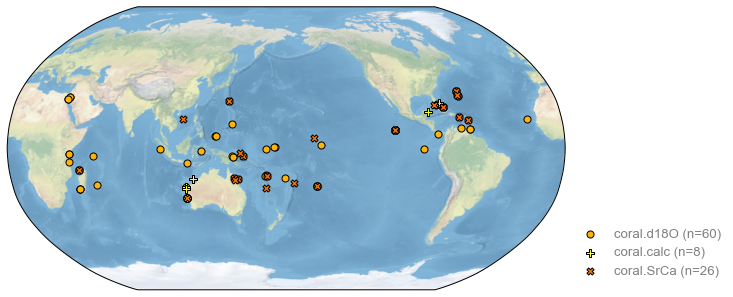

In [5]:
# we only annualize coral records
job.annualize_proxydb(months=[12, 1, 2], ptypes=['coral'], verbose=True)
fig, ax = job.proxydb.plot()

## Load climate model priors

In [6]:
job.load_clim(
    tag='prior',
    path_dict={
        'tas': './data/tas_sfc_Amon_iCESM_past1000historical_085001-200512.nc',
    },
    center_period=[1951, 1980],
    verbose=True,
)

>>> job.configs["prior_path"] = {'tas': './data/tas_sfc_Amon_iCESM_past1000historical_085001-200512.nc'}
>>> job.configs["prior_center_period"] = [1951, 1980]
>>> job.configs["prior_lon_name"] = lon
>>> prior variables ['tas'] loaded
>>> job.prior created


## Load instrumental observations

In [7]:
job.load_clim(
    tag='obs',
    path_dict={
        'tas': './data/gistemp1200_ERSSTv4.nc',
    },
    rename_dict={'tas': 'tempanomaly', 'pr': 'precip'},
    center_period=[1951, 1980],
    verbose=True,
)

>>> job.configs["obs_path"] = {'tas': './data/gistemp1200_ERSSTv4.nc'}
>>> job.configs["obs_rename_dict"] = {'tas': 'tempanomaly', 'pr': 'precip'}
>>> job.configs["obs_center_period"] = [1951, 1980]
>>> job.configs["obs_lon_name"] = lon
>>> obs variables ['tas'] loaded
>>> job.obs created


## Calibrate the PSMs

In [9]:
ptype_psm_dict = {
    'coral.d18O': 'Linear',
    'coral.SrCa': 'Linear',
    'coral.calc': 'Linear',
}
ptype_season_dict = {
    'coral.d18O': [12, 1, 2],
    'coral.SrCa': [12, 1, 2],
    'coral.calc': [12, 1, 2],
}
job.calib_psms(ptype_psm_dict=ptype_psm_dict, ptype_season_dict=ptype_season_dict, verbose=True)

>>> job.configs["ptype_psm_dict"] = {'coral.d18O': 'Linear', 'coral.SrCa': 'Linear', 'coral.calc': 'Linear'}
>>> job.configs["ptype_season_dict"] = {'coral.d18O': [12, 1, 2], 'coral.SrCa': [12, 1, 2], 'coral.calc': [12, 1, 2]}


Calibrating the PSMs::  14%|█▍        | 13/94 [00:01<00:05, 14.76it/s]

The number of overlapped data points is 13 < 25. Skipping ...


Calibrating the PSMs::  22%|██▏       | 21/94 [00:01<00:05, 13.89it/s]

The number of overlapped data points is 8 < 25. Skipping ...


Calibrating the PSMs::  48%|████▊     | 45/94 [00:03<00:02, 16.65it/s]

The number of overlapped data points is 21 < 25. Skipping ...
The number of overlapped data points is 21 < 25. Skipping ...


Calibrating the PSMs::  54%|█████▍    | 51/94 [00:03<00:02, 16.30it/s]

The number of overlapped data points is 0 < 25. Skipping ...


Calibrating the PSMs::  73%|███████▎  | 69/94 [00:04<00:01, 14.96it/s]

The number of overlapped data points is 20 < 25. Skipping ...


Calibrating the PSMs:: 100%|██████████| 94/94 [00:06<00:00, 14.18it/s]

>>> The PSM for Ocn_144 failed to calibrate.
>>> The PSM for Ocn_145 failed to calibrate.
>>> The PSM for Ocn_164 failed to calibrate.
>>> The PSM for Ocn_165 failed to calibrate.
>>> The PSM for Ocn_138 failed to calibrate.
>>> The PSM for Ocn_183 failed to calibrate.
>>> 88 records tagged "calibrated" with ProxyRecord.psm created


## Forward the PSMs

In [10]:
job.forward_psms(verbose=True)

Forwarding the PSMs:: 100%|██████████| 88/88 [00:26<00:00,  3.30it/s]

>>> ProxyRecord.pseudo created for 88 records


In [11]:
# let's add the pids into the configurations
job.mark_pids(verbose=True)

>>> job.configs["pids"] = ['Ocn_065', 'Ocn_075', 'Ocn_078', 'Ocn_167', 'Ocn_096', 'Ocn_086', 'Ocn_101', 'Ocn_070', 'Ocn_076', 'Ocn_144', 'Ocn_178', 'Ocn_158', 'Ocn_177', 'Ocn_080', 'Ocn_171', 'Ocn_108', 'Ocn_068', 'Ocn_069', 'Ocn_145', 'Ocn_098', 'Ocn_115', 'Ocn_170', 'Ocn_180', 'Ocn_154', 'Ocn_155', 'Ocn_111', 'Ocn_112', 'Ocn_116', 'Ocn_130', 'Ocn_131', 'Ocn_147', 'Ocn_106', 'Ocn_174', 'Ocn_077', 'Ocn_083', 'Ocn_160', 'Ocn_172', 'Ocn_060', 'Ocn_166', 'Ocn_123', 'Ocn_140', 'Ocn_141', 'Ocn_164', 'Ocn_165', 'Ocn_179', 'Ocn_082', 'Ocn_066', 'Ocn_067', 'Ocn_138', 'Ocn_168', 'Ocn_142', 'Ocn_143', 'Ocn_088', 'Ocn_129', 'Ocn_110', 'Ocn_084', 'Ocn_073', 'Ocn_114', 'Ocn_081', 'Ocn_175', 'Ocn_176', 'Ocn_120', 'Ocn_121', 'Ocn_127', 'Ocn_128', 'Ocn_074', 'Ocn_183', 'Ocn_173', 'Ocn_118', 'Ocn_139', 'Ocn_061', 'Ocn_062', 'Ocn_079', 'Ocn_156', 'Ocn_104', 'Ocn_107', 'Ocn_157', 'Ocn_146', 'Ocn_181', 'Ocn_182', 'Ocn_162', 'Ocn_163', 'Ocn_161', 'Ocn_125', 'Ocn_090', 'Ocn_119', 'Ocn_109', 'Ocn_097', 'Ocn_

## Annualize/seasonalize the climate model prior

In [12]:
job.annualize_clim(tag='prior', verbose=True, months=[12, 1, 2])

>>> job.configs["prior_annualize_months"] = [12, 1, 2]
>>> Processing tas ...
>>> job.prior updated


In [13]:
job.regrid_clim(tag='prior', nlat=42, nlon=63, verbose=True)
# job.prior['tas'].da

>>> job.configs["prior_regrid_nlat"] = 42
>>> job.configs["prior_regrid_nlon"] = 63
>>> Processing tas ...


## Saving the `job` object

In [14]:
job.save(save_dirpath='./data/exp_mc', verbose=True)

>>> job.configs["save_dirpath"] = ./data/exp_mc
>>> job saved to: ./data/exp_mc


## Load the `job` object

In [15]:
import pandas as pd
job = pd.read_pickle('./data/exp_mc/job.pkl')

## Data assimilation

In [20]:
job.run_mc(recon_seeds=list(range(20)), verbose=True)

>>> job.configs["recon_seeds"] = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
>>> seed: 0 | max: 19


KF updating: 100%|██████████| 2001/2001 [01:04<00:00, 30.96it/s] 


>>> Reconstructed fields saved to: ./data/exp_mc/job_r00_recon.nc
>>> seed: 1 | max: 19


KF updating: 100%|██████████| 2001/2001 [01:14<00:00, 26.74it/s] 


>>> Reconstructed fields saved to: ./data/exp_mc/job_r01_recon.nc
>>> seed: 2 | max: 19


KF updating: 100%|██████████| 2001/2001 [01:16<00:00, 26.21it/s] 


>>> Reconstructed fields saved to: ./data/exp_mc/job_r02_recon.nc
>>> seed: 3 | max: 19


KF updating: 100%|██████████| 2001/2001 [01:12<00:00, 27.74it/s] 


>>> Reconstructed fields saved to: ./data/exp_mc/job_r03_recon.nc
>>> seed: 4 | max: 19


KF updating: 100%|██████████| 2001/2001 [01:06<00:00, 30.31it/s] 


>>> Reconstructed fields saved to: ./data/exp_mc/job_r04_recon.nc
>>> seed: 5 | max: 19


KF updating: 100%|██████████| 2001/2001 [01:11<00:00, 28.09it/s] 


>>> Reconstructed fields saved to: ./data/exp_mc/job_r05_recon.nc
>>> seed: 6 | max: 19


KF updating: 100%|██████████| 2001/2001 [01:12<00:00, 27.50it/s] 


>>> Reconstructed fields saved to: ./data/exp_mc/job_r06_recon.nc
>>> seed: 7 | max: 19


KF updating: 100%|██████████| 2001/2001 [01:20<00:00, 24.89it/s] 


>>> Reconstructed fields saved to: ./data/exp_mc/job_r07_recon.nc
>>> seed: 8 | max: 19


KF updating: 100%|██████████| 2001/2001 [01:09<00:00, 28.75it/s] 


>>> Reconstructed fields saved to: ./data/exp_mc/job_r08_recon.nc
>>> seed: 9 | max: 19


KF updating: 100%|██████████| 2001/2001 [01:10<00:00, 28.31it/s] 


>>> Reconstructed fields saved to: ./data/exp_mc/job_r09_recon.nc
>>> seed: 10 | max: 19


KF updating: 100%|██████████| 2001/2001 [01:20<00:00, 24.73it/s] 


>>> Reconstructed fields saved to: ./data/exp_mc/job_r10_recon.nc
>>> seed: 11 | max: 19


KF updating: 100%|██████████| 2001/2001 [01:17<00:00, 25.72it/s] 


>>> Reconstructed fields saved to: ./data/exp_mc/job_r11_recon.nc
>>> seed: 12 | max: 19


KF updating: 100%|██████████| 2001/2001 [01:16<00:00, 26.30it/s] 


>>> Reconstructed fields saved to: ./data/exp_mc/job_r12_recon.nc
>>> seed: 13 | max: 19


KF updating: 100%|██████████| 2001/2001 [01:17<00:00, 25.94it/s] 


>>> Reconstructed fields saved to: ./data/exp_mc/job_r13_recon.nc
>>> seed: 14 | max: 19


KF updating: 100%|██████████| 2001/2001 [01:17<00:00, 25.76it/s] 


>>> Reconstructed fields saved to: ./data/exp_mc/job_r14_recon.nc
>>> seed: 15 | max: 19


KF updating: 100%|██████████| 2001/2001 [01:27<00:00, 22.91it/s] 


>>> Reconstructed fields saved to: ./data/exp_mc/job_r15_recon.nc
>>> seed: 16 | max: 19


KF updating: 100%|██████████| 2001/2001 [01:16<00:00, 26.01it/s] 


>>> Reconstructed fields saved to: ./data/exp_mc/job_r16_recon.nc
>>> seed: 17 | max: 19


KF updating: 100%|██████████| 2001/2001 [01:19<00:00, 25.27it/s] 


>>> Reconstructed fields saved to: ./data/exp_mc/job_r17_recon.nc
>>> seed: 18 | max: 19


KF updating: 100%|██████████| 2001/2001 [01:16<00:00, 26.14it/s] 


>>> Reconstructed fields saved to: ./data/exp_mc/job_r18_recon.nc
>>> seed: 19 | max: 19


KF updating: 100%|██████████| 2001/2001 [01:15<00:00, 26.46it/s] 


>>> Reconstructed fields saved to: ./data/exp_mc/job_r19_recon.nc
>>> DONE!


## Save the configurations to a YAML file

In [ ]:
job.save_cfg(verbose=True)

>>> job.configs saved to: ./data/exp_mc/configs.yml


## Run the job based on the configurations in a YAML file

In [ ]:
job = cfr.ReconJob()
job.run_cfg('./data/exp_mc/configs.yml', verbose=True)

>>> job.configs loaded
{'annualize_proxydb_months': [6, 7, 8],
 'annualize_proxydb_ptypes': ['coral'],
 'assim_frac': 0.75,
 'compress_params': {'least_significant_digit': 1, 'zlib': True},
 'obs_center_period': [1951, 1980],
 'obs_lon_name': 'lon',
 'obs_path': {'tas': './data/gistemp1200_ERSSTv4.nc'},
 'obs_rename_dict': {'pr': 'precip', 'tas': 'tempanomaly'},
 'output_full_ens': False,
 'pids': ['Ocn_075',
          'Ocn_167',
          'Ocn_091',
          'Ocn_093',
          'Ocn_096',
          'Ocn_086',
          'Ocn_101',
          'Ocn_070',
          'Ocn_076',
          'Ocn_099',
          'Ocn_178',
          'Ocn_177',
          'Ocn_080',
          'Ocn_103',
          'Ocn_068',
          'Ocn_069',
          'Ocn_098',
          'Ocn_180',
          'Ocn_130',
          'Ocn_131',
          'Ocn_147',
          'Ocn_077',
          'Ocn_083',
          'Ocn_160',
          'Ocn_166',
          'Ocn_123',
          'Ocn_179',
          'Ocn_082',
          'Ocn_138',

Annualizing ProxyRecord: 100%|██████████| 60/60 [00:03<00:00, 16.08it/s]


>>> job.configs["prior_path"] = {'tas': './data/tas_sfc_Amon_iCESM_past1000historical_085001-200512.nc'}
>>> job.configs["prior_center_period"] = [1951, 1980]
>>> prior variables ['tas'] loaded
>>> job.prior created
>>> job.configs["obs_path"] = {'tas': './data/gistemp1200_ERSSTv4.nc'}
>>> job.configs["obs_rename_dict"] = {'pr': 'precip', 'tas': 'tempanomaly'}
>>> job.configs["obs_center_period"] = [1951, 1980]
>>> obs variables ['tas'] loaded
>>> job.obs created
>>> job.configs["ptype_psm_dict"] = {'coral.SrCa': 'Linear', 'coral.d18O': 'Linear'}
>>> job.configs["ptype_season_dict"] = {'coral.SrCa': [6, 7, 8], 'coral.d18O': [6, 7, 8]}


Calibrating the PSMs::  53%|█████▎    | 32/60 [00:02<00:01, 15.44it/s]

The number of overlapped data points is 0 < 25. Skipping ...


Calibrating the PSMs:: 100%|██████████| 60/60 [00:04<00:00, 14.51it/s]


>>> The PSM for Ocn_138 failed to calibrate.
>>> 59 records tagged "calibrated" with ProxyRecord.psm created


Forwarding the PSMs:: 100%|██████████| 59/59 [00:18<00:00,  3.11it/s]


>>> ProxyRecord.pseudo created for 59 records
>>> job.configs["prior_annualize_months"] = [6, 7, 8]
>>> Processing tas ...
>>> job.prior updated
>>> job.configs["prior_regrid_nlat"] = 42
>>> job.configs["prior_regrid_nlon"] = 63
>>> Processing tas ...
>>> job.configs["recon_period"] = [0, 2000]
>>> job.configs["recon_loc_rad"] = 25000
>>> job.configs["recon_timescale"] = 1
>>> job.configs["recon_seeds"] = [0, 1]
>>> job.configs["assim_frac"] = 0.75
>>> job.configs["compress_params"] = {'least_significant_digit': 1, 'zlib': True}
>>> job.configs["output_full_ens"] = False
>>> seed: 0 | max: 1


KF updating: 100%|██████████| 2001/2001 [00:43<00:00, 46.39it/s] 


>>> Reconstructed fields saved to: ./data/exp_mc/job_r00_recon.nc
>>> seed: 1 | max: 1


KF updating: 100%|██████████| 2001/2001 [00:51<00:00, 39.24it/s] 


>>> Reconstructed fields saved to: ./data/exp_mc/job_r01_recon.nc
>>> DONE!
